# Predicting survival on the Titanic disaster
**Weld Lucas Cunha**

## Overview

Welcome to my notebook! <br/>
In this notebook, we'll apply different Machine Learning techniques to predict which passengers survived the Titanic shipwreck. <br/>
The chosen data is the "Titanic - Machine Learning from Disaster" dataset, available at https://www.kaggle.com/c/titanic.

![titanic](../imgs/titanic2-0349859403-2203948..capa_widexl.jpg)

## Importing Modules and Reading the Dataset

In [1]:
import sys, os
import copy
from collections import Counter

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# import folium
# from geopy.geocoders import Nominatim

# from sklearn import linear_model
# from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE 

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({'font.size': 12})
np.random.seed(42)

In [2]:
# Loading my kaggle keys
os.environ['KAGGLE_CONFIG_DIR'] = "../Kaggle/"

In [3]:
# Reading the dataset files
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [4]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))

print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))

print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))

print('Training columns:', df_train.columns)
print('Test columns:',df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Training columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Test columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
# Taking a look at some data samples
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S


Each instance of this dataset represents one single person that was on the ship. The following features are available:

- PassengerId: Passenger ID in the ship (numerical)
- Survived: Passenger Survived or not (categorical)
- Pclass: Ticket class (categorical)
- Name: Passenger name (categorical)
- Sex: Passenger sex (categorical)
- Age: Passenger age (numerical)
- SibSp: Number of siblings/spouser aboard the ship (numerical)
- Parch: Number of parents/children aboard the ship (numerical)
- Ticket: Ticket number (categorical)
- Fare: Passenger fare (numerical)
- Cabin: Cabin number (categorical)
- Embarked: Port of Embarkation (categorical)

In [8]:
# Exploring column types and the presence of null values per column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Number of null samples per column:
null_samples = {col:df_train[col].isnull().sum() for col in df_train.columns}
null_samples

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

Some null values were found at the Age, Cabin and Embarked features.

In [10]:
# Basic statistics for the numerical columns
df_description = df_train.describe().transpose()
df_description

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Exploratory Data Analysis

In [11]:
num_cols = ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']
ord_cols = ['Pclass']
cat_cols = ['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

print('Numeric Features:', num_cols)
print('Ordinary Features:', ord_cols)
print('Categoric Features:', cat_cols)

Numeric Features: ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']
Ordinary Features: ['Pclass']
Categoric Features: ['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


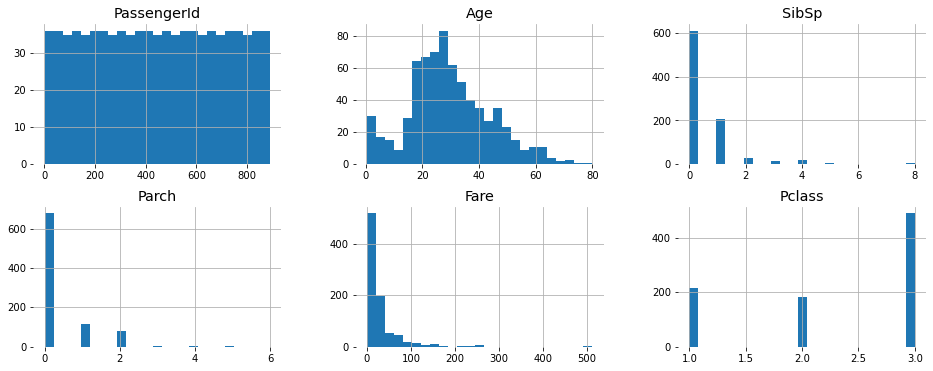

In [12]:
# Numeric Features distribution:
df_tmp = df_train[num_cols+ord_cols]
h = df_tmp.hist(bins=25, figsize=(16, 16), xlabelsize='10', ylabelsize='10', layout=(5, 3))
sns.despine(left=True, bottom=True)

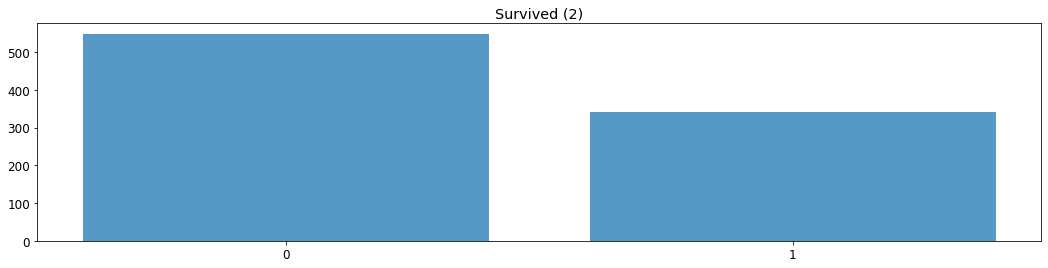

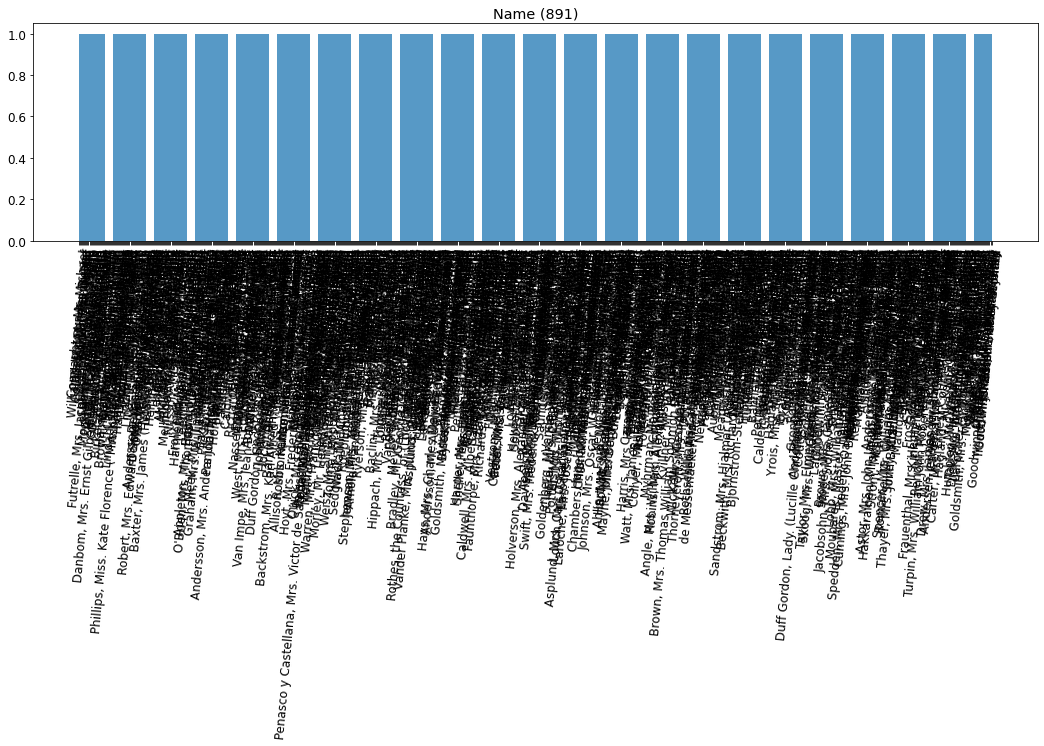

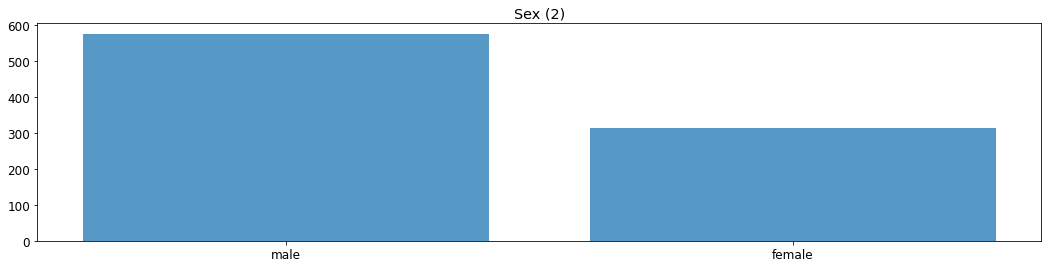

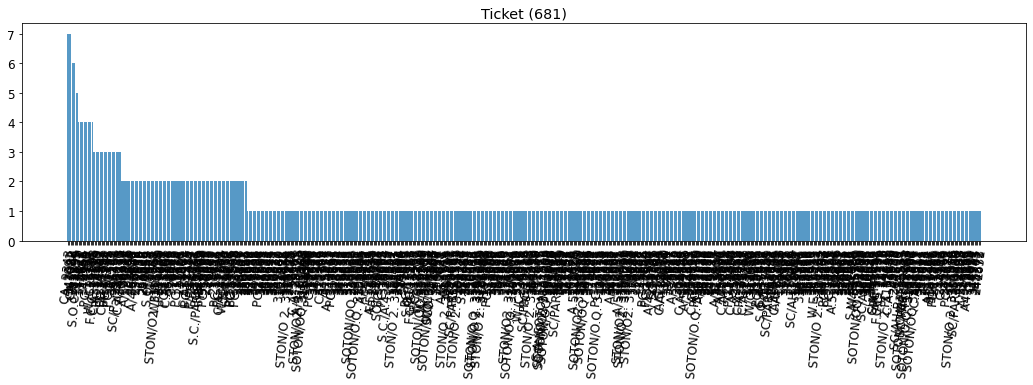

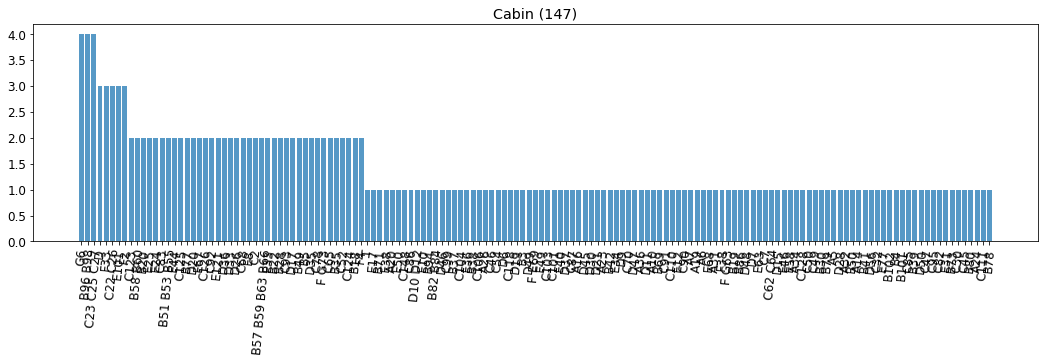

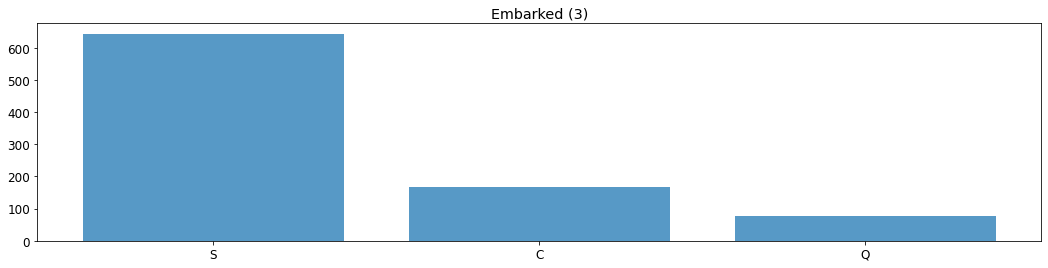

In [13]:
# Categoric features distribution
for i,feat in enumerate(cat_cols):
    plt.figure(figsize=(18, 4))
    df_counts = pd.value_counts(df_train[feat], dropna=True)
    plt.title(f'{feat} ({df_counts.shape[0]})')
    x_ticks = np.arange(0, df_counts.shape[0], 1)
    plt.bar(x_ticks, df_counts.values, alpha=0.75)
    if df_counts.shape[0] > 5:
        plt.xticks(x_ticks, df_counts.index, rotation=85)
    else:
        plt.xticks(x_ticks, df_counts.index)
#     plt.tight_layout()
    plt.show()

We can observe that some features, such as  PassengerId and name, might not bring relevant information for our analysis, since these features represent individual personal features and not groups of people. <br/>

Ticket and Cabin might be very important features, but have too many "categories" and must be preprocessed in order to better contribute to our model.

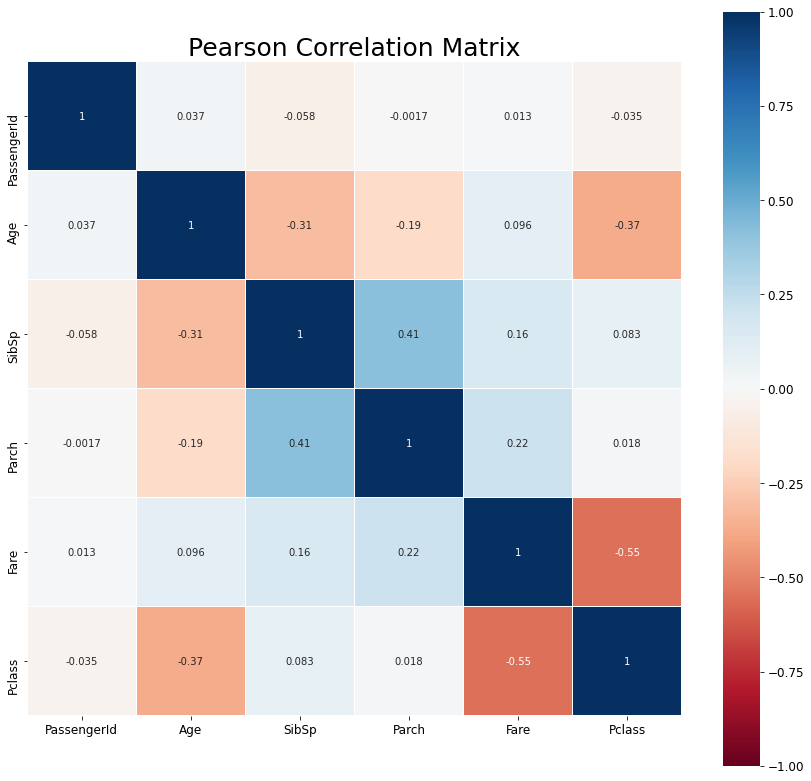

In [14]:
# Checking Out the Correlation Among Explanatory Variables
def plot_features_corr(df, figsize=(12, 12), cmap="RdBu", title='Pearson Correlation Matrix'):   
    df_corr = df.corr()
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=25)
    sns.heatmap(df_corr, linewidths=0.25, vmax=1, vmin=-1, square=True, cmap=cmap,
                linecolor='w', annot=True, annot_kws={"size":10}, cbar_kws={"shrink": .9})
    plt.tight_layout()
    plt.show()

plot_features_corr(df_train[num_cols+ord_cols])

As expected the PasssengerID has no correlation with any other numerical feature.
The highest correlations (in absolute value) are observed among the following pair of features:
- Fare and Pclass;
- SibSp and Parch ;
- Age and Pclass.

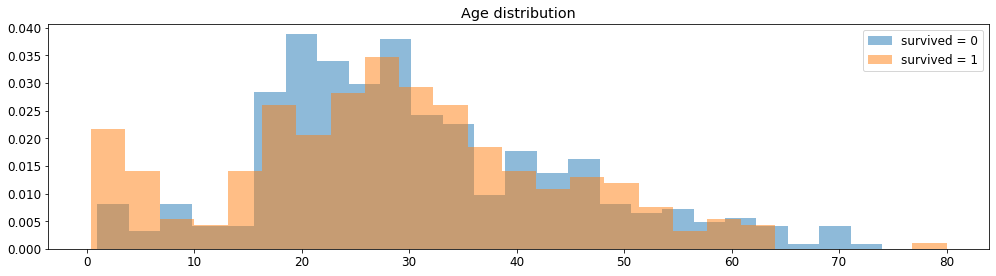

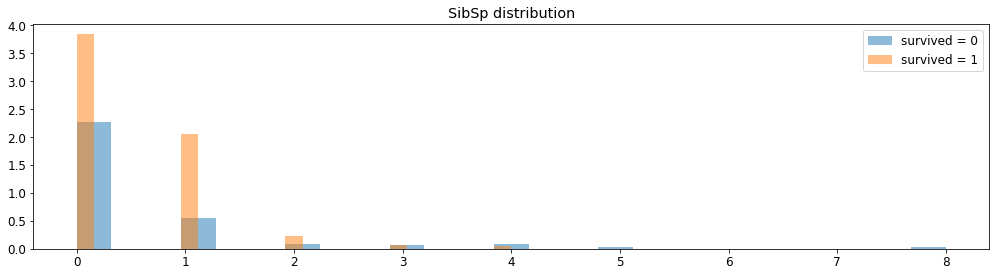

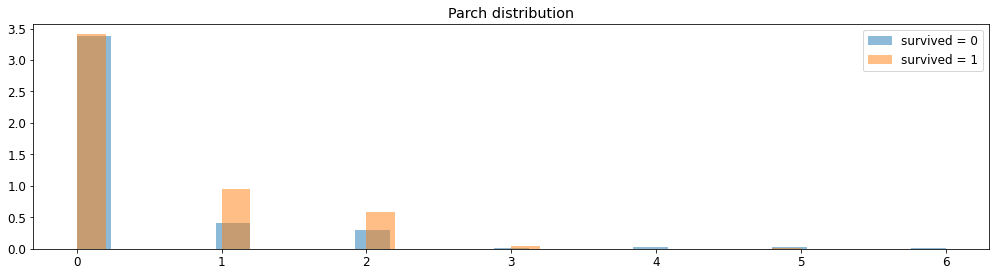

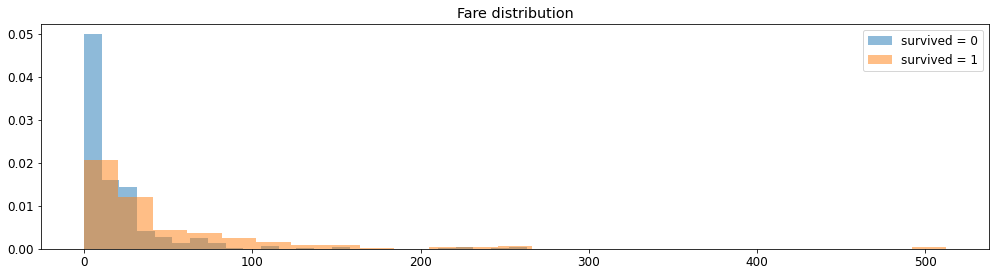

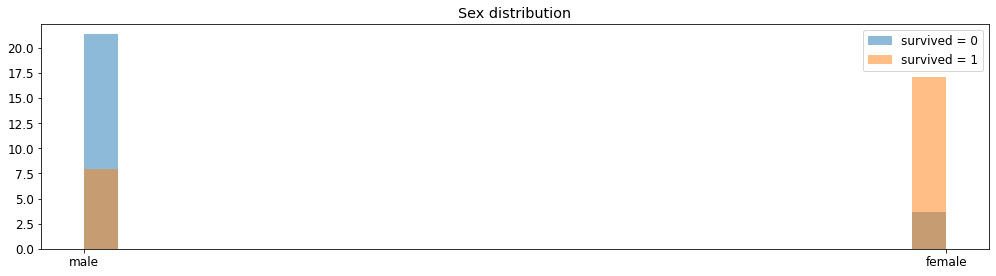

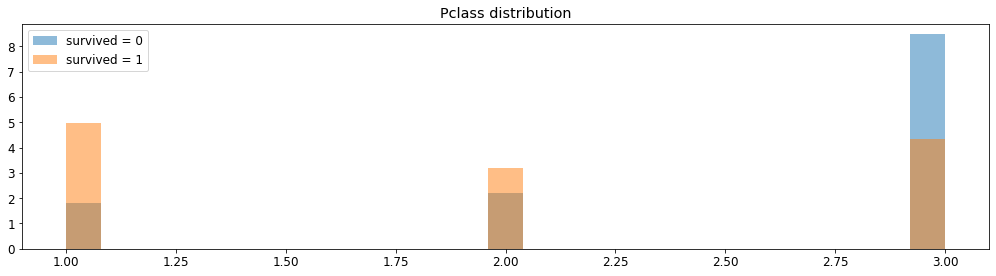

In [15]:
# Plotting some features distributions separated by survival results
selected_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Pclass']
df_train_survive0 = df_train[df_train['Survived'] == 0]
df_train_survive1 = df_train[df_train['Survived'] == 1]

for col in selected_features:
    plt.figure(figsize=(14, 4))
    plt.title(f"{col} distribution")
    plt.hist(df_train_survive0[col], alpha=0.5, bins=25, label='survived = 0', density=True)
    plt.hist(df_train_survive1[col], alpha=0.5, bins=25, label='survived = 1', density=True)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

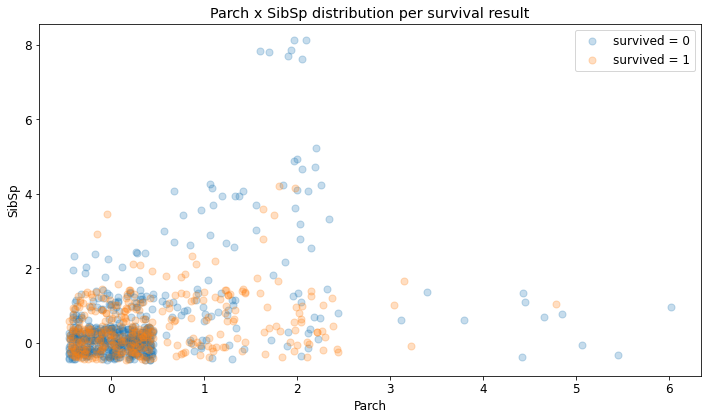

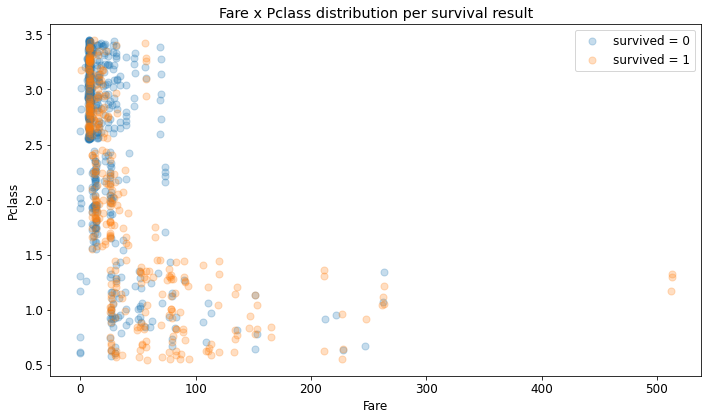

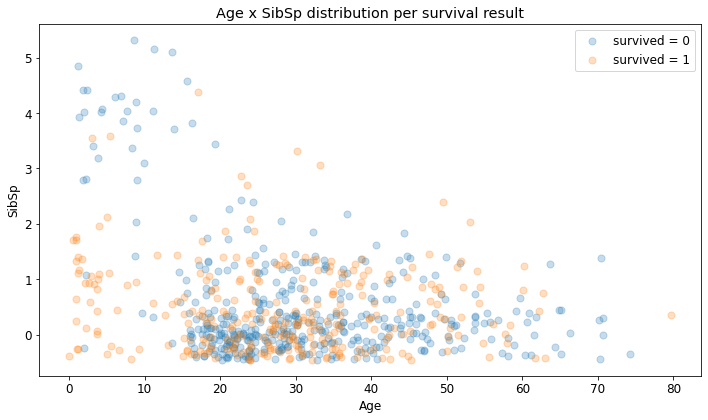

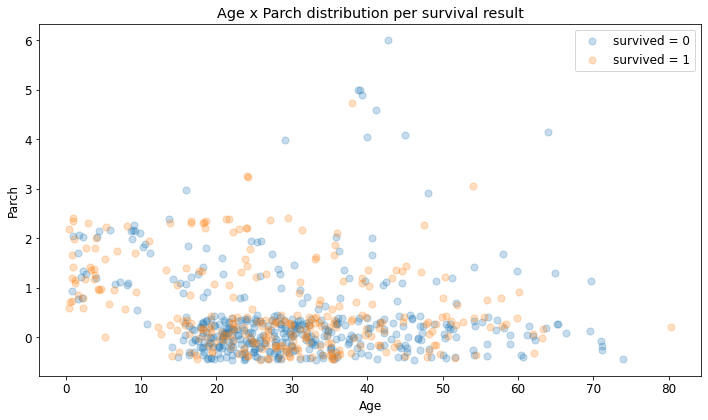

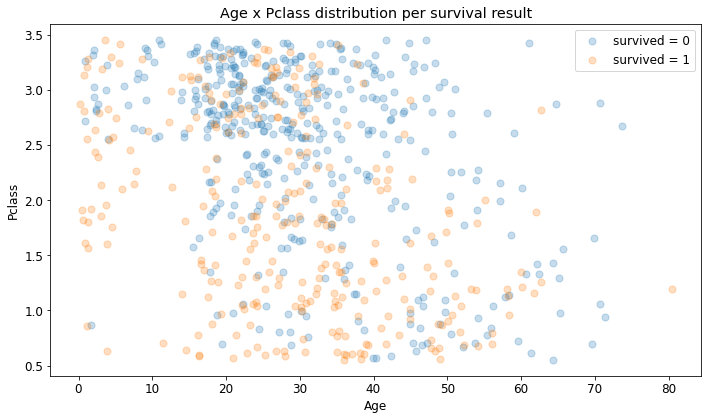

In [16]:
# Plotting some features scatter plots
def plot_scatter_2d(df_0, df_1, col1, col2, alpha = 0.25, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.title(f"{col1} x {col2} distribution per survival result")
    plt.scatter(df_0[col1]+(np.random.rand(df_0.shape[0])-0.5)/1.1,
                df_0[col2]+(np.random.rand(df_0.shape[0])-0.5)/1.1,
                alpha=alpha, s=50, label='survived = 0')
    plt.scatter(df_1[col1]+(np.random.rand(df_1.shape[0])-0.5)/1.1,
                df_1[col2]+(np.random.rand(df_1.shape[0])-0.5)/1.1,
                alpha=alpha, s=50, label='survived = 1')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    
feature_pairs = [('Parch', 'SibSp'),
                 ('Fare', 'Pclass'),
                 ('Age', 'SibSp'),
                 ('Age', 'Parch'),
                 ('Age', 'Pclass'),
                ]
for feat1, feat2  in feature_pairs:
    plot_scatter_2d(df_train_survive0, df_train_survive1, col1=feat1, col2=feat2)

In [17]:
# Exploring the cabin name
def get_cabin_init(cabin_name):
    if pd.isnull(cabin_name):
        init = "Null"
    else:
        init = cabin_name[0]    
    return init

df_train['Cabin_deck'] = df_train['Cabin'].apply(get_cabin_init)
df_test['Cabin_deck'] = df_test['Cabin'].apply(get_cabin_init)

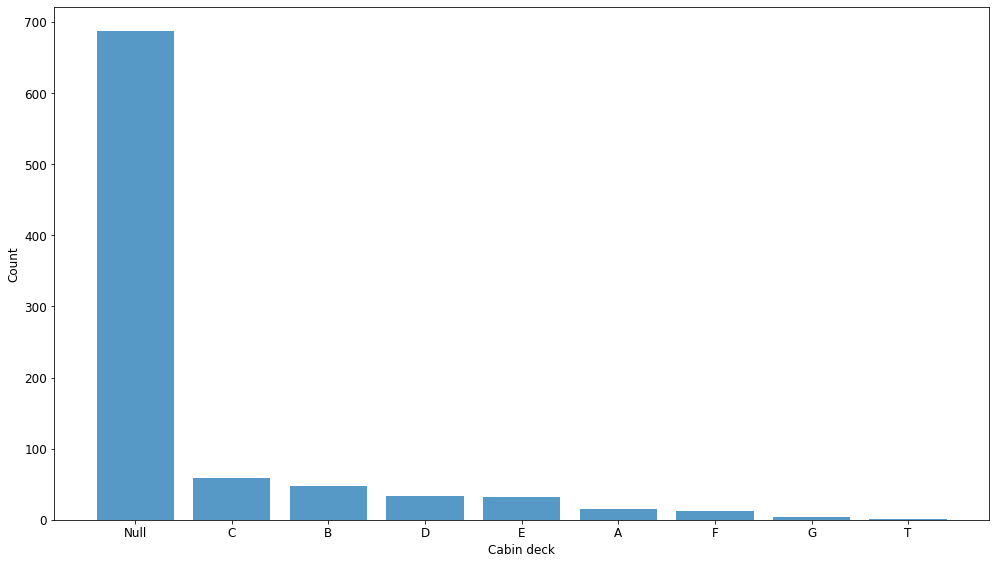

In [18]:
plt.figure(figsize=(14, 8))
df_counts = pd.value_counts(df_train['Cabin_deck'], dropna=True)
x_ticks = np.arange(0, df_counts.shape[0], 1)
plt.bar(x_ticks, df_counts.values, alpha=0.75)
plt.xticks(x_ticks, df_counts.index)
plt.xlabel("Cabin deck")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

While googling on the internet, I found out that the first letter of the Cabin values are the decks in which the cabins are located. So getting the cabin deck might help our model training.

In [19]:
df_train.groupby(['Cabin_deck', 'Pclass', 'Sex']).count()

PassengerId  Survived  Name  Age  SibSp  Parch  \
Cabin_deck Pclass Sex                                                      
A          1      female            1         1     1    1      1      1   
                  male             14        14    14   11     14     14   
B          1      female           27        27    27   26     27     27   
                  male             20        20    20   19     20     20   
C          1      female           27        27    27   25     27     27   
                  male             32        32    32   26     32     32   
D          1      female           16        16    16   15     16     16   
                  male             13        13    13   12     13     13   
           2      female            2         2     2    2      2      2   
                  male              2         2     2    2      2      2   
E          1      female           10        10    10    9     10     10   
                  male             15        15    15   15     15     15   
           2      female            4         4     4    3      4      4   
           3      female            1         1     1    1      1      1   
                  male              2         2     2    2      2      2   
F          2      female            4         4     4    4      4      4   
                  male              4         4     4    4      4      4   
           3      female            1         1     1    0      1      1   
                  male              4         4     4    3      4      4   
G          3      female            4         4     4    4      4      4   
Null       1      female           13        13    13    9     13     13   
                  male             27        27    27   17     27     27   
           2      female           66        66    66   65     66     66   
                  male            102       102   102   93    102    102   
           3      female          138       138   138   97    138    138   
                  male            341       341   341  248    341    341   
T          1      male              1         1     1    1      1      1   

                          Ticket  Fare  Cabin  Embarked  
Cabin_deck Pclass Sex                                    
A          1      female       1     1      1         1  
                  male        14    14     14        14  
B          1      female      27    27     27        25  
                  male        20    20     20        20  
C          1      female      27    27     27        27  
                  male        32    32     32        32  
D          1      female      16    16     16        16  
                  male        13    13     13        13  
           2      female       2     2      2         2  
                  male         2     2      2         2  
E          1      female      10    10     10        10  
                  male        15    15     15        15  
           2      female       4     4      4         4  
           3      female       1     1      1         1  
                  male         2     2      2         2  
F          2      female       4     4      4         4  
                  male         4     4      4         4  
           3      female       1     1      1         1  
                  male         4     4      4         4  
G          3      female       4     4      4         4  
Null       1      female      13    13      0        13  
                  male        27    27      0        27  
           2      female      66    66      0        66  
                  male       102   102      0       102  
           3      female     138   138      0       138  
                  male       341   341      0       341  
T          1      male         1     1      1         1

There might be some relation between the deck and the passenger class, however, the cabin feature is missing too many values and filling the missing ones might be tricky. By now, we'll keep with the Cabin deck feature without filling the missing ones.

# Data Preparation

### Droping duplicates

In [20]:
# Drop duplicates
df_no_duplicates = df_train.drop_duplicates()

print('Original data:', df_train.shape[0], 'samples -',
      df_train.shape[0]-df_no_duplicates.shape[0], 'duplicated samples were found.')

df_train = df_no_duplicates

Original data: 891 samples - 0 duplicated samples were found.


### Fixing missing values

In [21]:
# Fixing missing values for Age:
age_medians_by_sex_class = df_train.groupby(['Sex', 'Pclass']).median()['Age']
age_medians_by_sex_class

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [22]:
def fill_missing_age_values(df, age_medians):
    for sex,pclass in age_medians.index:
        median_age_val = age_medians[sex][pclass]
        df_tmp = df[(df['Sex'] == sex) & (df['Pclass'] == pclass) & (df['Age'].isnull())]
        df.loc[df_tmp.index, 'Age'] = median_age_val
    return df

df_train = fill_missing_age_values(df_train, age_medians_by_sex_class)
df_test = fill_missing_age_values(df_test, age_medians_by_sex_class)

Missing values in Age are filled with median age, but using median age of the whole data set is not a good choice. Median age of Pclass groups is the best choice because of its high correlation with Age

### Splitting X and y arrays

In [23]:
# Useful variables:
Y_TARGET = 'Survived'

In [24]:
# Splitting X and y:
y_train = df_train[Y_TARGET]
X_train = df_train.drop(columns=[Y_TARGET])

X_test = df_test.drop(columns=[Y_TARGET], errors='ignore')

## Preprocessing

In [25]:
# Listing all the features by type
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
ordinary_features = ['Pclass']
categoric_features = ['Sex', 'Embarked', 'Cabin_deck']

print(len(numeric_features + ordinary_features + categoric_features), 'features selected')

8 features selected


In all cases a SimpleImputer will be used in order to avoid any possibility of breaking the model in case a null value is found. <br/>
For the numeric columns a MinMaxScaler will be used in order to scale all the features to 0~1 range. <br/>
For the categorical columns, the OneHotEncoder will be used.

In [26]:
# Features encoding
features_encoder = ColumnTransformer([("numeric features", Pipeline([('num imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                                                                     ('num scaling', MinMaxScaler()),
                                                                ]), numeric_features),
                                      ("ordinary features", Pipeline([('ord imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                                                     ('ord scaling', MinMaxScaler()),
                                                                ]), ordinary_features),
                                      ("categoric features", Pipeline([('cat imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                                                       ('cat one-hot encoder', OneHotEncoder(handle_unknown='ignore')),
                                                                ]), categoric_features),
                                     ], remainder='drop')

In [27]:
# Features selection
features_selector = VarianceThreshold(threshold=0)

In [28]:
# Features creation
features_creator = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [29]:
# Pre-processing pipeline:
preprocessor_lin = Pipeline([('features encoding', copy.deepcopy(features_encoder)),
                             ('features selection', copy.deepcopy(features_selector)),
                            ])

In [30]:
# Pre-processing pipeline:
preprocessor_poly = Pipeline([('features encoding', copy.deepcopy(features_encoder)),
                              ('features creation', copy.deepcopy(features_creator)),
                              ('features selection', copy.deepcopy(features_selector)),
                             ])

Two pre-processing pipelines were created with different stages:
- 1: Features encoding + features selection (by variance threshold)
- 2: Features encoding + features selection (by variance threshold) + polynomial combination of the features (degree: 2)

In [31]:
# Encoding the data
X_train_lin = preprocessor_lin.fit_transform(X_train, y_train)
pd.DataFrame(X_train_lin)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.472229,0.125,0.000000,0.139136,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.000,0.000000,0.015469,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.434531,0.125,0.000000,0.103644,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.000,0.000000,0.025374,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,0.233476,0.000,0.000000,0.058556,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.264891,0.125,0.333333,0.045771,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
889,0.321438,0.000,0.000000,0.058556,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X_train_poly = preprocessor_poly.fit_transform(X_train, y_train)
pd.DataFrame(X_train_poly)

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.472229,0.125,0.000000,0.139136,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.000,0.000000,0.015469,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.434531,0.125,0.000000,0.103644,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.000,0.000000,0.025374,0.5,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
887,0.233476,0.000,0.000000,0.058556,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.264891,0.125,0.333333,0.045771,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
889,0.321438,0.000,0.000000,0.058556,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_test_lin = preprocessor_lin.transform(X_test)
pd.DataFrame(X_test_lin)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.428248,0.000,0.000000,0.015282,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.585323,0.125,0.000000,0.013663,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.773813,0.000,0.000000,0.018909,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.334004,0.000,0.000000,0.016908,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.271174,0.125,0.166667,0.023984,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.308872,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
414,0.484795,0.000,0.000000,0.212559,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.478512,0.000,0.000000,0.014151,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
416,0.308872,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
X_test_poly = preprocessor_poly.transform(X_test)
pd.DataFrame(X_test_poly)

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,0.428248,0.000,0.000000,0.015282,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.585323,0.125,0.000000,0.013663,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.773813,0.000,0.000000,0.018909,0.5,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.334004,0.000,0.000000,0.016908,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.271174,0.125,0.166667,0.023984,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.308872,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
414,0.484795,0.000,0.000000,0.212559,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.478512,0.000,0.000000,0.014151,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
416,0.308872,0.000,0.000000,0.015713,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Baseline Models

Two baseline models are trained, considering two preprocessin pipelines (linear and polynomial)

In [35]:
# Baseline lin
clf_lin = SGDClassifier().fit(X_train_lin, y_train)

In [36]:
# Summaryze metrics lin:
y_pred_lin_train = clf_lin.predict(X_train_lin)
y_pred_lin_test = clf_lin.predict(X_test_lin)

train_metrics = {'Model/Stage': 'Train - Lin',
                 'accuracy_score': accuracy_score(y_train, y_pred_lin_train),
                 'balanced_accuracy_score': balanced_accuracy_score(y_train, y_pred_lin_train),
                 'f1_score': f1_score(y_train, y_pred_lin_train),
                }

baseline_metrics = []
baseline_metrics.append(train_metrics)

In [37]:
print(classification_report(y_train, y_pred_lin_train))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       549
           1       0.86      0.58      0.69       342

    accuracy                           0.80       891
   macro avg       0.82      0.76      0.77       891
weighted avg       0.81      0.80      0.79       891



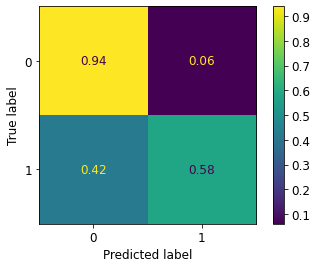

In [38]:
# Confusion matrix
plot_confusion_matrix(clf_lin, X_train_lin, y_train, normalize='true')
plt.show()

In [39]:
submission_lin = df_test[['PassengerId']]
submission_lin['Survived'] = y_pred_lin_test
submission_lin.to_csv('../submissions/submission_lin.csv', index=False)

In [40]:
# ! kaggle competitions submit -c titanic -f "../submissions/submission_lin.csv" -m "Baseline with linear features"

In [41]:
# Baseline poly
clf_poly = SGDClassifier().fit(X_train_poly, y_train)

In [42]:
# Summaryze metrics poly:
y_pred_poly_train = clf_poly.predict(X_train_poly)
y_pred_poly_test = clf_poly.predict(X_test_poly)

train_metrics = {'Model/Stage': 'Train - Poly',
                 'accuracy_score': accuracy_score(y_train, y_pred_poly_train),
                 'balanced_accuracy_score': balanced_accuracy_score(y_train, y_pred_poly_train),
                 'f1_score': f1_score(y_train, y_pred_poly_train),
                }

baseline_metrics.append(train_metrics)

In [43]:
print(classification_report(y_train, y_pred_poly_train))

              precision    recall  f1-score   support

           0       0.85      0.91      0.87       549
           1       0.83      0.73      0.78       342

    accuracy                           0.84       891
   macro avg       0.84      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



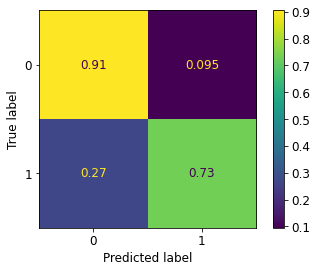

In [44]:
# Confusion matrix
plot_confusion_matrix(clf_poly, X_train_poly, y_train, normalize='true')
plt.show()

In [45]:
submission_poly = df_test[['PassengerId']]
submission_poly['Survived'] = y_pred_poly_test
submission_poly.to_csv('../submissions/submission_poly.csv', index=False)

In [46]:
# ! kaggle competitions submit -c titanic -f "../submissions/submission_poly.csv" -m "Baseline with polynomial features"

In [47]:
# Baseline metrics
baseline_metrics = pd.DataFrame(baseline_metrics)
baseline_metrics

,Model/Stage,accuracy_score,balanced_accuracy_score,f1_score
0,Train - Lin,0.802469,0.760881,0.693380
1,Train - Poly,0.839506,0.819600,0.778295


Kaggle baseline submissions <br/>
![kaggle baseline](../imgs/kaggle_submissions_baseline.png)

Two baselines were created (with and without adding polynomial combination of features). <br/>
The creation of new features by polynomial combination significantly improved the performance on the training dataset, while considering the same ML technique (linear model).
However, in the test dataset, the performance of the model trained with the polynomial features was worse. This might be caused by the curse of dimensionality, since many of the features created might not bring relevant information to the model.

Since the model with the linear features presented best results in the test, this model was selected for the next stage.

## Dealing with classes imbalance

In order to avoid problems to the classes imbalance, the smote technique will be applied in the training dataset.

In [48]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 549, 1: 342})


In [49]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_res = sm.fit_resample(X_train_lin, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res))

Resampled dataset shape Counter({0: 549, 1: 549})


## Enhanced Models Training and Validation

In this stage, some advanced models will be trained considering the polynomial features:
- Random Forest Classifier
- Logistic Regression Classifier
- KNN Classifier
- MLP Classifier

In [50]:
# Training settings:
n_jobs = 4
n_iter = 100
cv = 10
scoring = 'balanced_accuracy'

X_train_ = X_train_smote
y_train_ = y_train_res
X_test_ = X_test_lin

In [51]:
# RandomForest:
param_grid = {'n_estimators': [1,3,5,8,10,12,15,20],
              'criterion': ["gini", "entropy"],
              'max_depth': [3,4,5,8],
              'min_samples_split': [2,4,6,8,10],
              'max_features': [3, 5, 8, 10, "auto", "sqrt", "log2"],
             }

rf_clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, n_iter=n_iter, cv=cv,
                             scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
rf_clf.fit(X_train_, y_train_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 8],
                                        'max_features': [3, 5, 8, 10, 'auto',
                                                         'sqrt', 'log2'],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [1, 3, 5, 8, 10, 12, 15,
                                                         20]},
                   random_state=42, scoring='balanced_accuracy', verbose=1)

In [52]:
# LogisticRegression:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'tol': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
              'C': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             }

logreg_clf = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid, n_iter=n_iter, cv=cv,
                             scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
logreg_clf.fit(X_train_, y_train_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=100, n_jobs=4,
                   param_distributions={'C': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.1, 0.01, 0.001, 0.0001,
                                                1e-05]},
                   random_state=42, scoring='balanced_accuracy', verbose=1)

In [53]:
# KNeighbors:
param_grid = {'n_neighbors': [1, 3, 5, 10],
              'weights': ["uniform", "distance"],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [3, 5, 8, 10, 20, 30, 40],
             }

knn_clf = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=n_iter, cv=cv,
                             scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
knn_clf.fit(X_train_, y_train_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=4,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [3, 5, 8, 10, 20, 30, 40],
                                        'n_neighbors': [1, 3, 5, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='balanced_accuracy', verbose=1)

In [54]:
# MLP:
param_grid = {'hidden_layer_sizes': [4, 8, 16, 32, 64],
              'activation': ['identity', 'logistic', 'tanh'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [1e-5, 1e-4, 1e-3, 1e-2],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
             }

mlp_clf = RandomizedSearchCV(MLPClassifier(), param_distributions=param_grid, n_iter=n_iter, cv=cv,
                             scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
mlp_clf.fit(X_train_, y_train_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=MLPClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh'],
                                        'alpha': [1e-05, 0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [4, 8, 16, 32,
                                                               64],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=42, scoring='balanced_accuracy', verbose=1)

In the sequence, the performance of all the hyperparameters combinations is summaryzed:

In [55]:
def plot_estimators_cvperf(estimators_list, figsize=(12, 6), error_metric=''):
    data = [pd.DataFrame(estimator.cv_results_)['mean_test_score'].dropna().values for estimator in estimators_list]
    estimator_names = [str(estimator.estimator).replace('()', '') for estimator in estimators_list]
        
    plt.figure(figsize=figsize)
    plt.title('Model(s) CV performance')
    plt.boxplot(data)
    plt.xticks([i+1 for i in range(len(estimator_names))], estimator_names)
    plt.xlabel('model techniques')
    plt.ylabel(error_metric)
    plt.tight_layout()
    plt.show()

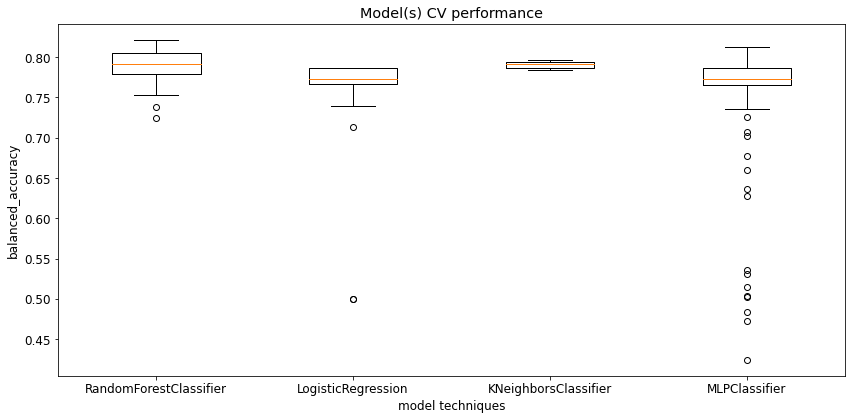

In [56]:
estimators_list = [rf_clf, logreg_clf, knn_clf, mlp_clf]
plot_estimators_cvperf(estimators_list, error_metric=scoring)

This is an important graph, each box represents the performance of all the hyperparameters combinations of one technique.
In the y axis, we show the values of the error metric used for comparison between all cross-validation values.
With this plot we can analyse which technique had the best performance by:
- Considering which technique had the highest performance of all
- Also, we can compare the erros distribution for each technique.

The main classification metrics are shown bellow, for the best estimator of each technique.

In [57]:
def get_model_metrics(estimators_list, estimator_names, X_train, y_train, stage='Train'):
    model_metrics = []
    for est,est_name in zip(estimators_list, estimator_names):
        y_pred_poly_train = est.predict(X_train)

        train_metrics = {'Model/Stage': f"{stage} - {est_name}",
                         'accuracy_score': accuracy_score(y_train, y_pred_poly_train),
                         'balanced_accuracy_score': balanced_accuracy_score(y_train, y_pred_poly_train),
                         'f1_score': f1_score(y_train, y_pred_poly_train),
                        }
        model_metrics.append(train_metrics)
    return pd.DataFrame(model_metrics)

best_estimators = [est.best_estimator_ for est in estimators_list]
est_names = [str(est.estimator).replace('()', '') for est in estimators_list]
model_metrics = get_model_metrics(best_estimators, est_names, X_train_, y_train_)
model_metrics

,Model/Stage,accuracy_score,balanced_accuracy_score,f1_score
0,Train - RandomForestClassifier,0.878871,0.878871,0.875585
1,Train - LogisticRegression,0.794171,0.794171,0.791128
2,Train - KNeighborsClassifier,0.830601,0.830601,0.821154
3,Train - MLPClassifier,0.842441,0.842441,0.838167


However, the best estimator is chosen as the best mean score considering the cross-validation made by the RandomizedSearchCV. <br/>
After selecting the best hyperparameters set, the model is trained considering all the data available for training.

In [58]:
model = estimators_list[np.argmax([pd.DataFrame(m.cv_results_)['mean_test_score'].dropna().max() for m in estimators_list])].best_estimator_
model.fit(X_train_, y_train_)

RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_split=6,
                       n_estimators=12)

## Conclusion

In [59]:
# Final model performance on the test dataset
model_metrics_final = get_model_metrics(estimators_list=[model], estimator_names=[str(model).split('(')[0]],
                                        X_train=X_train_, y_train=y_train_, stage='Train (all data)')
model_metrics_final

,Model/Stage,accuracy_score,balanced_accuracy_score,f1_score
0,Train (all data) - RandomForestClassifier,0.867942,0.867942,0.864865


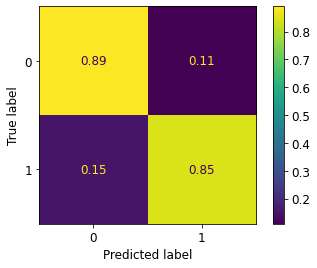

In [60]:
# Confusion matrix
plot_confusion_matrix(model, X_train_, y_train_, cmap='viridis', normalize='true')
plt.show()

In [61]:
baseline_metrics

,Model/Stage,accuracy_score,balanced_accuracy_score,f1_score
0,Train - Lin,0.802469,0.760881,0.693380
1,Train - Poly,0.839506,0.819600,0.778295


The performance of the best model, in the test dataset is shown here. It's possible to see a clear evolution on the metrics when compared to the baseline models.

In [62]:
y_pred = model.predict(X_test_)

In [63]:
submission_final = df_test[['PassengerId']]
submission_final['Survived'] = y_pred
submission_final.to_csv('../submissions/submission_final.csv', index=False)

In [64]:
# model_name = str(model).split('(')[0]
# ! kaggle competitions submit -c titanic -f "../submissions/submission_final.csv" -m f"Final submission with enhanced model ({model_name})"

Kaggle final submission <br/>
![kaggle final](../imgs/kaggle_final_submission.png)

Predicting passengers survival on the Titanic dataset is a classic challenge in ML!
However, it's important to note that this model is not applicable to other ships, since this is a very unique situation.